<H1>Лабораторная работа №8</H1>

<H3>Ким Д.А. 5130901/10201</H3>

<H3>Упражнение 8.2</H3>
Убедимся, что преобразование Фурье гауссовой кривой также гауссова кривая.

Функция приведенная ниже строит графики гаусовой кривой и ее БПФ.

In [2]:
import thinkdsp
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [3]:
def plot_gaussian(std):
    M = 32
    gaussian = scipy.signal.gaussian(M=M, std=std)
    gaussian /= sum(gaussian)
    
    plt.subplot(1, 2, 1)
    plt.plot(gaussian)
    thinkdsp.decorate(xlabel='Time')

    fft_gaussian = np.fft.fft(gaussian)
    fft_rolled = np.roll(fft_gaussian, M//2)
    
    plt.subplot(1, 2, 2)
    plt.plot(np.abs(fft_rolled))
    thinkdsp.decorate(xlabel='Frequency')
    plt.show()


Проверим работу функции.

C:\Users\kanea\AppData\Local\Temp\ipykernel_11204\2586889685.py:3: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gaussian = scipy.signal.gaussian(M=M, std=std)


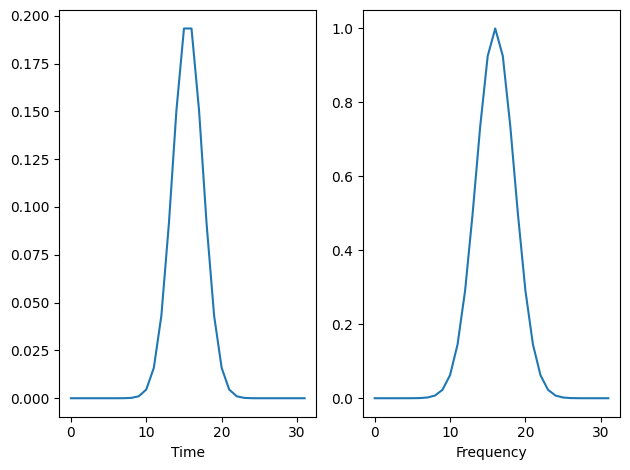

In [4]:
plot_gaussian(2)

Попробуем разные значения std.

C:\Users\kanea\AppData\Local\Temp\ipykernel_11204\2586889685.py:3: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gaussian = scipy.signal.gaussian(M=M, std=std)


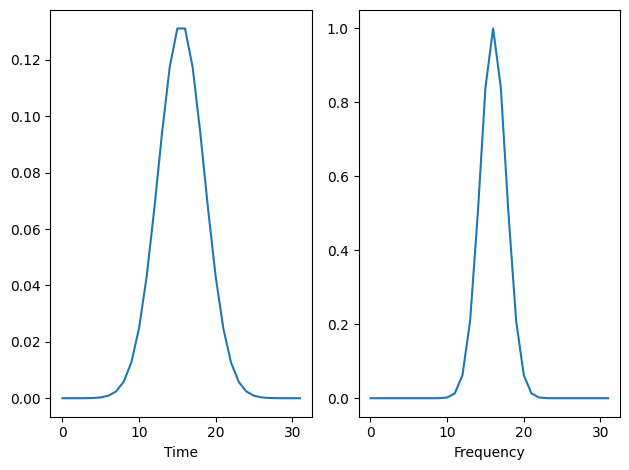

In [5]:
plot_gaussian(3)

C:\Users\kanea\AppData\Local\Temp\ipykernel_11204\2586889685.py:3: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gaussian = scipy.signal.gaussian(M=M, std=std)


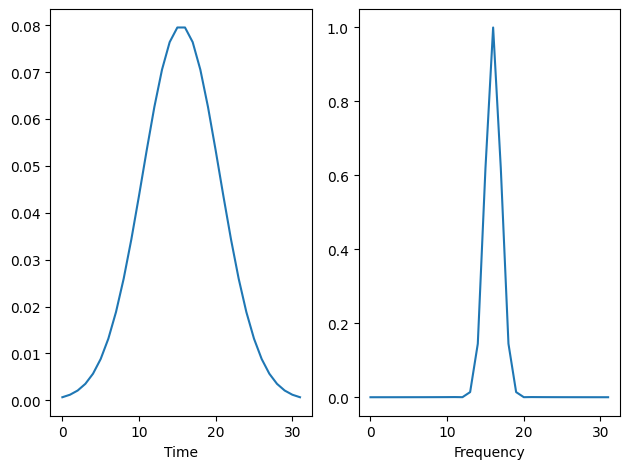

In [6]:
plot_gaussian(5)

Как мы видим с увеличением среднеквадратичного отклонения Гауссова кривая становится шире, а ее БПФ уже.

<H3>Упражнение 8.3</H3>

Создадим разные окна разных размеров, напечатаем их ДПФ и поэкспериментируем с ними.

In [11]:
signal = thinkdsp.SquareSignal(freq=440)
squareWave = signal.make_wave(duration=1.0, framerate=44100)

In [12]:
M = 15
std = 2.5

gaussian = scipy.signal.gaussian(M=M, std=std)   
bartlett = np.bartlett(M)
blackman = np.blackman(M)
hamming = np.hamming(M)
hanning = np.hanning(M)

windows = [blackman, gaussian, hanning, hamming]
names = ['blackman', 'gaussian', 'hanning', 'hamming']

for window in windows:
    window /= sum(window)

C:\Users\kanea\AppData\Local\Temp\ipykernel_11204\698470634.py:4: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gaussian = scipy.signal.gaussian(M=M, std=std)


Для того, чтобы напечатать ДПФ нам понадобятся функции для дополнения массива нулями и функция для печатания самих дпф.

In [13]:
def pad(array, n):
    res = np.zeros(n)
    res[:len(array)] = array
    return res

In [14]:
def plot_window_dfts(windows, names):

    for window, name in zip(windows, names):
        padded =  pad(window, len(squareWave))
        dft_window = np.fft.rfft(padded)
        plt.plot(abs(dft_window), label=name)

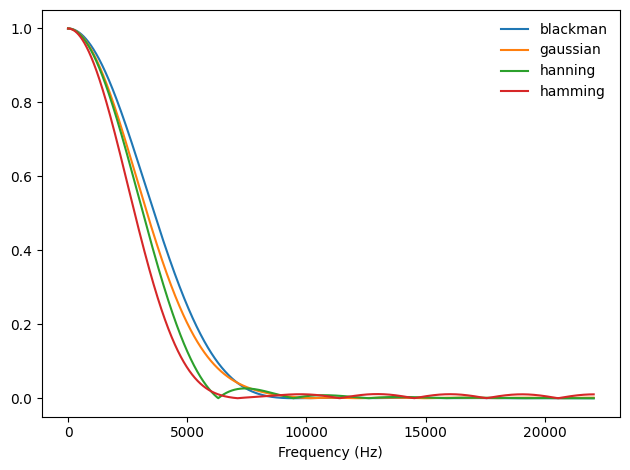

In [15]:
plot_window_dfts(windows, names)
thinkdsp.decorate(xlabel='Frequency (Hz)')

График Хемминга спадает быстрее всех. Разница между ними небольшая, но отличия все же присутсвуют. Нарисуем их на логарифмическом графике.

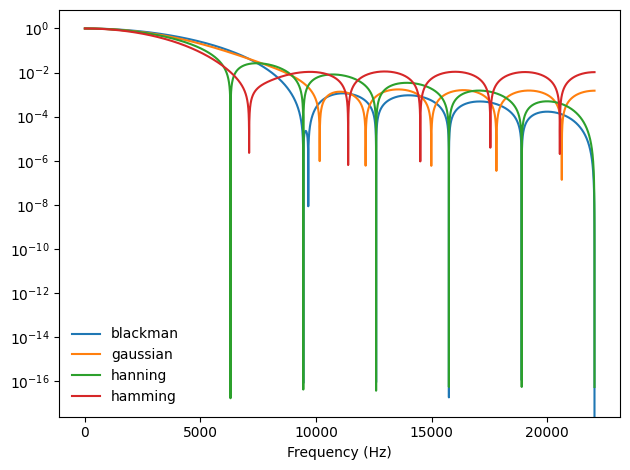

In [16]:
plot_window_dfts(windows, names)
thinkdsp.decorate(xlabel='Frequency (Hz)', yscale='log')

Хемминг спадает быстрее остальных и имеет минимальное количество "боковых лепестков", что делает его лучшим для фильтра НЧ.